In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import  GridSearchCV

c:\users\admin\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
digits = datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
x = digits.data

In [5]:
y = digits.target

In [6]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [7]:
some = x[666]

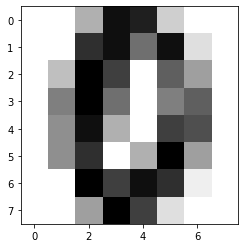

In [8]:
some_image = some.reshape(8,8)
plt.imshow(some_image, cmap = matplotlib.cm.binary)
plt.show()

In [9]:
%run C:\Users\Admin\PycharmProjects\mechine-learning\model_selection.py

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [11]:
%run C:\Users\Admin\PycharmProjects\mechine-learning\classify.py

In [12]:
from sklearn.neighbors import KNeighborsClassifier
my_knn_clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
my_knn_clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
my_knn_clf.score(x_test, y_test)

0.9749303621169917

In [15]:
best_score = 0.0
best_k = -1
for n in range(2,11):
    knn_clf = KNeighborsClassifier(n_neighbors=n, weights='distance',p=1)
    knn_clf.fit(x_train, y_train)
    score = knn_clf.score(x_test, y_test)
    if score > best_score:
        best_k = n
        best_score = score

print('best_k=', best_k)
print('best_score=', best_score)

best_k= 5
best_score= 0.9860724233983287


In [26]:
param_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1,11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1,11)],
        'p': [i for i in range(1, 6)]
    }
]

In [32]:
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, verbose=2)
grid_search.fit(x_train, y_train)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.1s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.1s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.1s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.1s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ..........

[CV] ............. n_neighbors=2, p=5, weights=distance, total=   0.6s
[CV] n_neighbors=2, p=5, weights=distance ............................
[CV] ............. n_neighbors=2, p=5, weights=distance, total=   0.6s
[CV] n_neighbors=2, p=5, weights=distance ............................
[CV] ............. n_neighbors=2, p=5, weights=distance, total=   0.5s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] ............. n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] ............. n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] ............. n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=3, p=2, weights=distance ............................
[CV] ............. n_neighbors=3, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=3, p=2, weights=distance ............................
[CV] .

[CV] ............. n_neighbors=6, p=4, weights=distance, total=   0.7s
[CV] n_neighbors=6, p=4, weights=distance ............................
[CV] ............. n_neighbors=6, p=4, weights=distance, total=   0.7s
[CV] n_neighbors=6, p=5, weights=distance ............................
[CV] ............. n_neighbors=6, p=5, weights=distance, total=   0.7s
[CV] n_neighbors=6, p=5, weights=distance ............................
[CV] ............. n_neighbors=6, p=5, weights=distance, total=   0.7s
[CV] n_neighbors=6, p=5, weights=distance ............................
[CV] ............. n_neighbors=6, p=5, weights=distance, total=   0.6s
[CV] n_neighbors=7, p=1, weights=distance ............................
[CV] ............. n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=7, p=1, weights=distance ............................
[CV] ............. n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=7, p=1, weights=distance ............................
[CV] .

[CV] ............ n_neighbors=10, p=3, weights=distance, total=   0.7s
[CV] n_neighbors=10, p=4, weights=distance ...........................
[CV] ............ n_neighbors=10, p=4, weights=distance, total=   0.7s
[CV] n_neighbors=10, p=4, weights=distance ...........................
[CV] ............ n_neighbors=10, p=4, weights=distance, total=   0.7s
[CV] n_neighbors=10, p=4, weights=distance ...........................
[CV] ............ n_neighbors=10, p=4, weights=distance, total=   0.7s
[CV] n_neighbors=10, p=5, weights=distance ...........................
[CV] ............ n_neighbors=10, p=5, weights=distance, total=   0.7s
[CV] n_neighbors=10, p=5, weights=distance ...........................
[CV] ............ n_neighbors=10, p=5, weights=distance, total=   0.7s
[CV] n_neighbors=10, p=5, weights=distance ...........................
[CV] ............ n_neighbors=10, p=5, weights=distance, total=   0.7s


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [34]:
grid_search.best_score_

0.9902642559109874

In [35]:
grid_search.best_params_

{'n_neighbors': 1, 'p': 3, 'weights': 'distance'}